### Financial Analytics Project 

### Importing Libraries and Loading Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statistics
from scipy import stats
from numpy import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Ankita\Downloads\Financial Analytics data.csv")
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


### Data understanding 

In [3]:
data.shape

(488, 5)

In [4]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [5]:
data.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN
487,500,L T Foods,NaN,NaN,NaN


In [6]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

### Basic Statistics 

In [7]:
data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [8]:

data.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [10]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


### Data Cleaning 

In [11]:
data.drop('S.No.',axis=1,inplace=True)

In [12]:
#dropping the unknown column , it has more than 50 % missing values.
data.drop('Unnamed: 4',axis=1,inplace=True)

In [13]:
data.columns

Index(['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [14]:
data

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
...,...,...,...
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53
486,Natl.Fertilizer,3017.07,2840.75


In [15]:
data.isnull().sum()

Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [16]:

#the column Mar Cap - Crore has very less missing values. 
#the column Sales Qtr - Crore has 25% missing values which is significantly less and to be concerned.
#since total observations in our dataset is very less,and without losing information from data i am imputing the columns.


In [17]:
# missing value treatment (imputation technique)
data['Mar Cap - Crore'].fillna(data['Mar Cap - Crore'].median(),inplace=True)
data['Sales Qtr - Crore'].fillna(data['Sales Qtr - Crore'].median(),inplace=True)

In [18]:
data.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

### Data visualisation

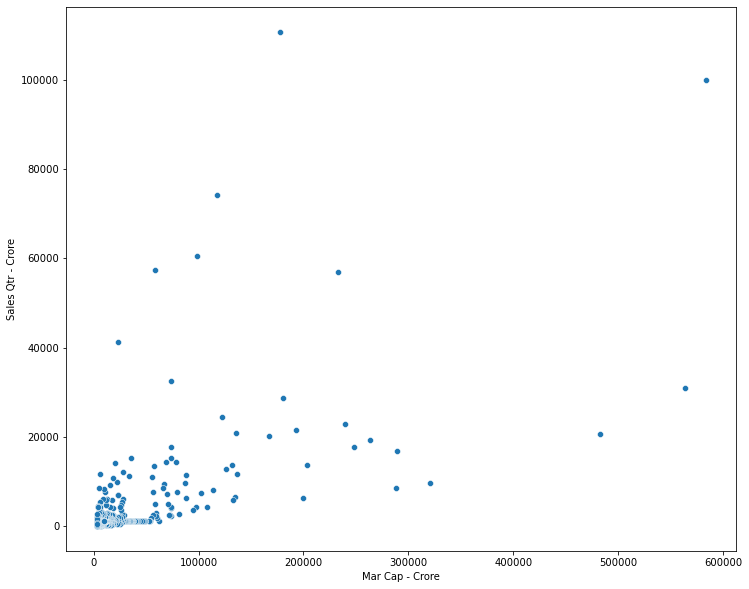

In [19]:
#  scatter plot
plt.figure(figsize=(12,10))
sns.scatterplot(data=data,x='Mar Cap - Crore',y='Sales Qtr - Crore')
plt.show()


#####  from this graph we observed that there is positive correlation between Market Capitalization and Quarterly Sales

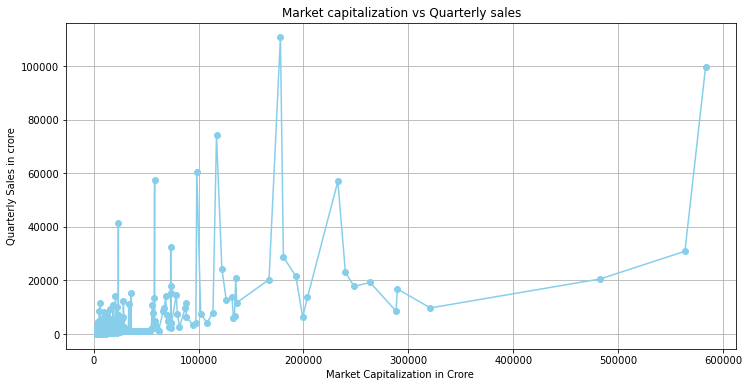

In [20]:
# plotting market capitalization in crores vs quarterly sales 
plt.figure(figsize=(12, 6))
plt.plot(data['Mar Cap - Crore'],data['Sales Qtr - Crore'],marker='o' ,color='skyblue')
plt.title('Market capitalization vs Quarterly sales')
plt.xlabel('Market Capitalization in Crore ')
plt.ylabel('Quarterly Sales in crore')
plt.grid(True)
plt.show()

##### this plot shows the fluctuating pattern in Market Capitalisation changes in Quarterly sales indiactes dynamic market conditions and complex relationships between buisness performances .

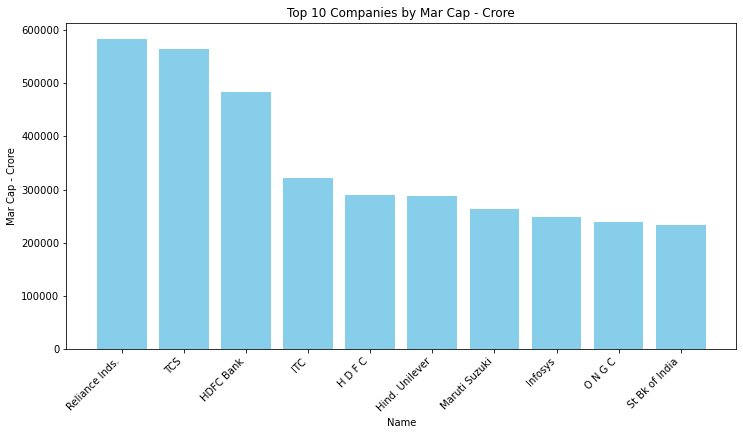

In [21]:
# Specify the top N companies
top_n = 10 


# Select the top N companies based on Market Capitalization
top_companies = data.nlargest(top_n, 'Mar Cap - Crore')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_companies['Name'], top_companies['Mar Cap - Crore'], color='skyblue')
plt.title(f'Top {top_n} Companies by Mar Cap - Crore')
plt.xlabel('Name')
plt.ylabel('Mar Cap - Crore')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Among the top 10 companies Reliance Inds.,TCS ,HDFC Bank have the highest market capitalization . 

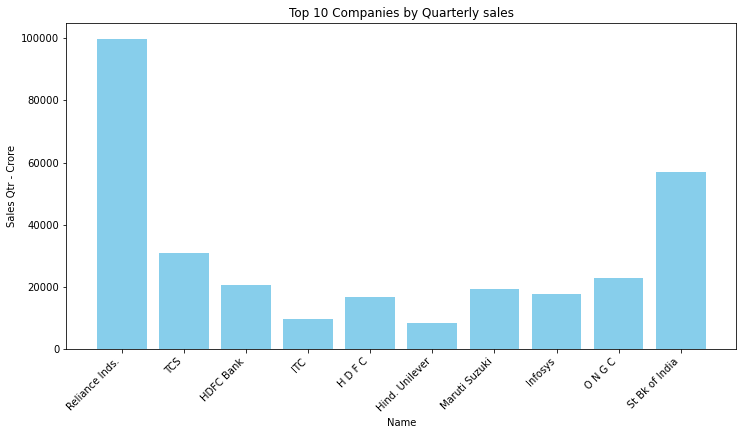

In [22]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_companies['Name'], top_companies['Sales Qtr - Crore'], color='skyblue')
plt.title(f'Top {top_n} Companies by Quarterly sales')
plt.xlabel('Name')
plt.ylabel('Sales Qtr - Crore')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Among the top 10 companies Reliance Inds. have the highest Quarterly Sales. 

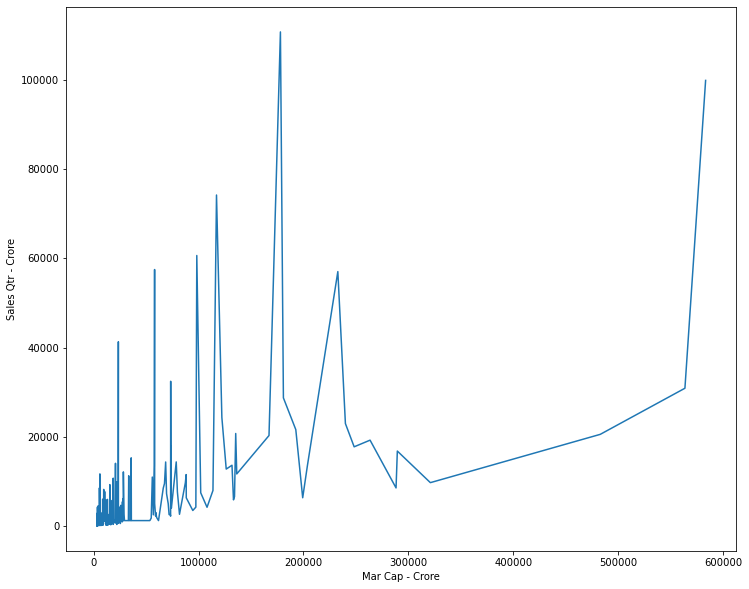

In [23]:

plt.figure(figsize=(12,10))
sns.lineplot(data=data,x='Mar Cap - Crore',y='Sales Qtr - Crore')
plt.show()

### Exploratory Data Analysis (EDA) 

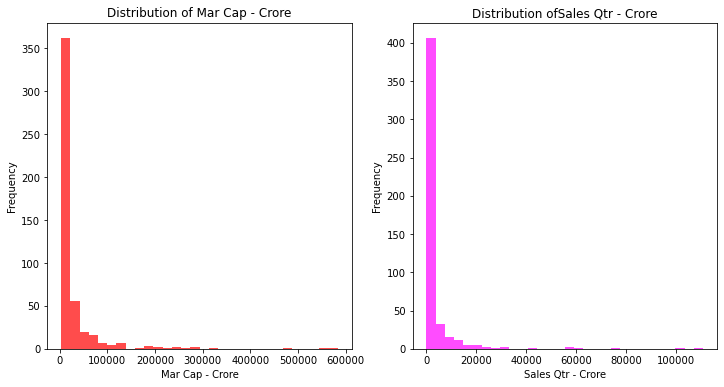

In [24]:
#histogram
variable1 = 'Mar Cap - Crore'
variable2 = 'Sales Qtr - Crore'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data[variable1].dropna(), bins=30, color='red', alpha=0.7)
plt.title(f'Distribution of {variable1}')
plt.xlabel(variable1)
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(data[variable2].dropna(), bins=30, color='magenta', alpha=0.7)
plt.title(f'Distribution of{variable2}')
plt.xlabel(variable2)
plt.ylabel('Frequency')

plt.show()

#### The distributions of Market Capitalization and Quarterly Sales are Right Skewed.

#####  

In [25]:
data1=data.corr()
data1

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620489
Sales Qtr - Crore,0.620489,1.000000


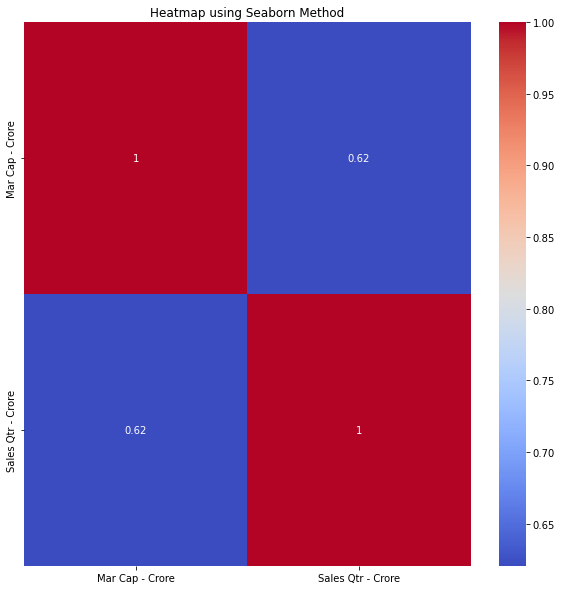

In [26]:
plt.figure(figsize=(10,10))
#heatmap=sns.heatmap(data1,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(data1,cmap="coolwarm",annot=True)
plt.title("Heatmap using Seaborn Method")
plt.show()

###### the column  Mar Cap - Crore	(market capitalisation in crore) have significantly high correlation as 0.62 with the other column  Sales Qtr - Crore (quarterly sales in crore)

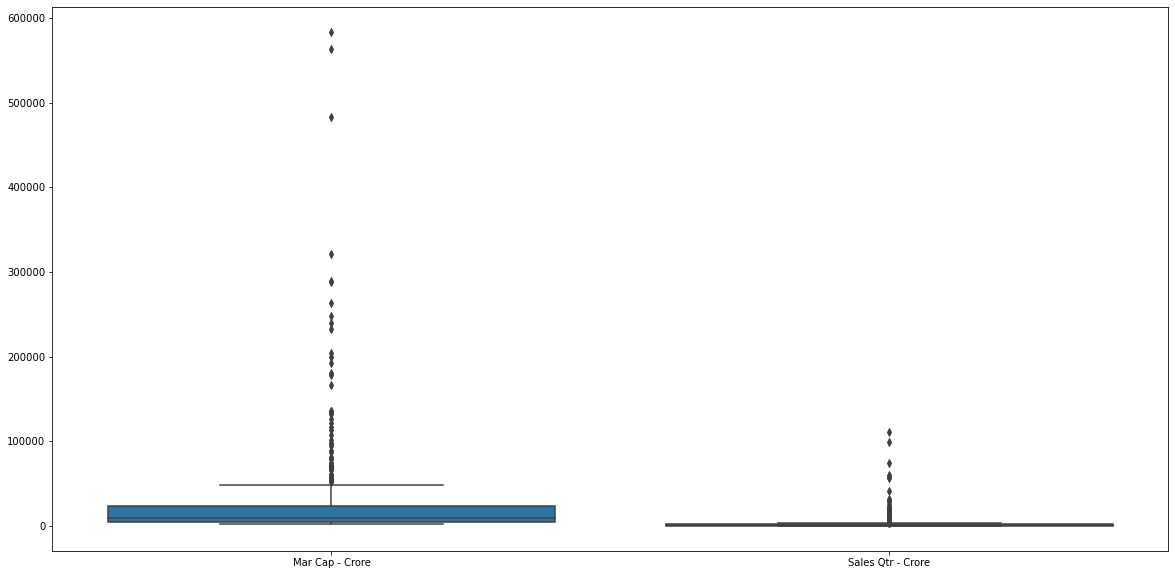

In [27]:
# boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.show()

#### The box plot  for Market Capitalization and Quarterly Sales reveals presence of outliers in the data.

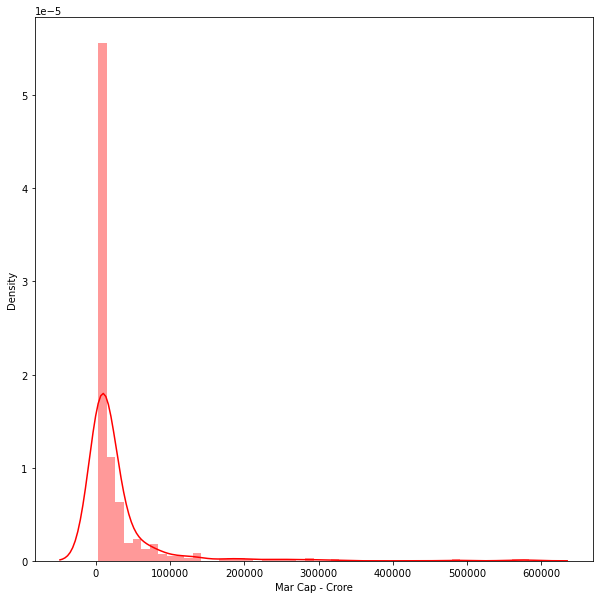

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(a=data['Mar Cap - Crore'],color='red')
plt.show()

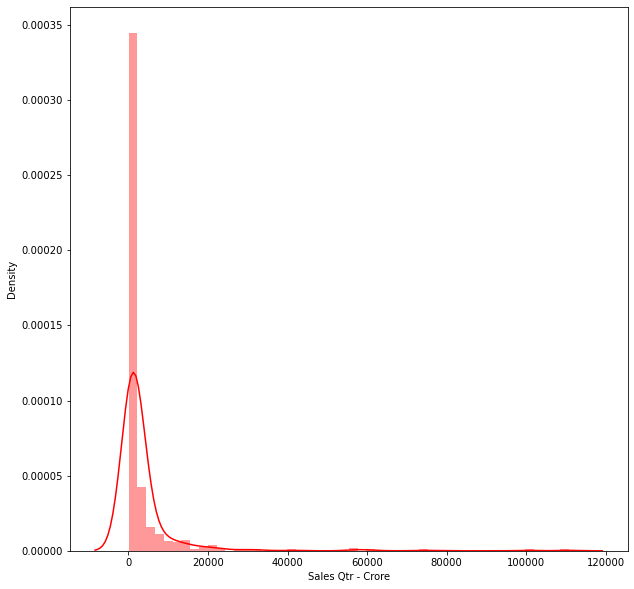

In [29]:
plt.figure(figsize=(10,10))
sns.distplot(a=data['Sales Qtr - Crore'],color='red')
plt.show()

### outlier detection 

In [30]:
#IQR method
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
IQR


Mar Cap - Crore      18521.2025
Sales Qtr - Crore     1358.3650
dtype: float64

In [31]:
l1=q1-(1.5*IQR)
u1=q1+(1.5*IQR)

In [32]:
# removing outliers
outlier=data[((data<l1)|(data>u1)).any(axis=1)]
outlier

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
...,...,...,...
405,Allahabad Bank,4137.11,4243.83
410,Andhra Bank,4067.25,4549.26
441,Corporation Bank,3716.46,4387.85
444,Oriental Bank,3674.60,4262.08


In [33]:
data.corr()

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620489
Sales Qtr - Crore,0.620489,1.000000


In [34]:
data.cov()

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,3.476674e+09,3.543343e+08
Sales Qtr - Crore,3.543343e+08,9.379814e+07


### data transformation

In [35]:
# to check whether our data curve is normal or not.
data.skew()

Mar Cap - Crore      5.613956
Sales Qtr - Crore    7.112592
dtype: float64

In [36]:
from sklearn.preprocessing import PowerTransformer

In [37]:
pt=PowerTransformer(method='box-cox',standardize=True)
data['Mar Cap - Crore']=pt.fit_transform(data[['Mar Cap - Crore']])
data['Sales Qtr - Crore']=pt.fit_transform(data[['Sales Qtr - Crore']])

In [38]:
data.skew() # skewness has reduced to acceptable range.

Mar Cap - Crore      0.173138
Sales Qtr - Crore   -0.060923
dtype: float64

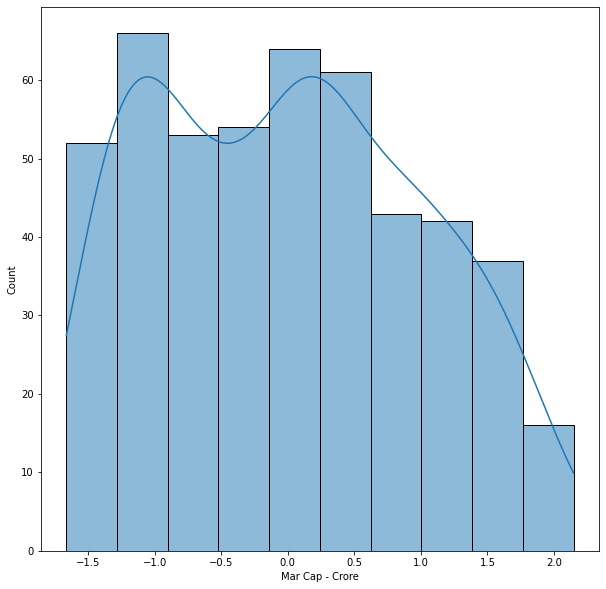

In [39]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x='Mar Cap - Crore',kde=True)
plt.show()

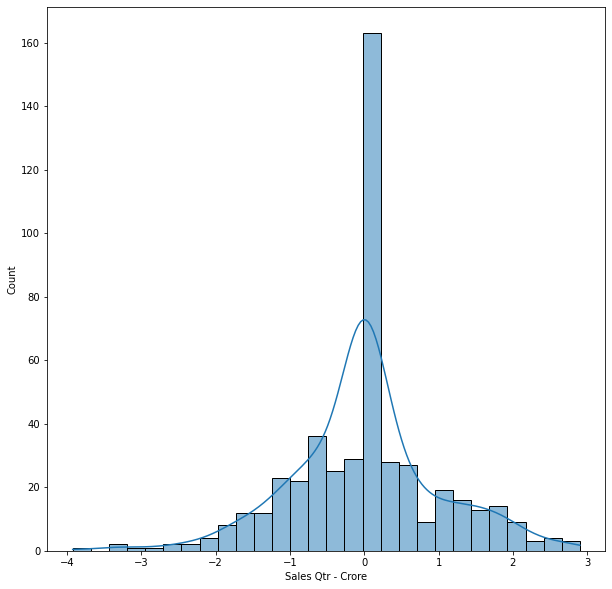

In [40]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x='Sales Qtr - Crore',kde=True)
plt.show()

In [41]:
data.drop('Name',axis=1,inplace=True)
# name column has 488 unique company names that's why i am dropping this column for further analysis.


### features scaling 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss=StandardScaler()
scaled_data=pd.DataFrame(ss.fit_transform(data),columns=['Market_capital_in_crores','Sales_quarterly_in_crores'])
scaled_data

,Market_capital_in_crores,Sales_quarterly_in_crores
0,2.147439,2.855483
1,2.140639,2.268473
2,2.108827,2.038231
3,2.014094,1.576053
4,1.987459,1.919058
...,...,...
483,-1.656342,-0.454184
484,-1.658308,-1.691650
485,-1.659461,-0.894361
486,-1.663782,0.678957


In [44]:
scaled_data.describe()

,Market_capital_in_crores,Sales_quarterly_in_crores
count,4.880000e+02,4.880000e+02
mean,-2.548266e-16,-2.269217e-16
std,1.001026e+00,1.001026e+00
min,-1.663782e+00,-3.922922e+00
25%,-8.799476e-01,-5.379357e-01
50%,1.834583e-02,-1.161676e-03
75%,8.080546e-01,4.252746e-01
max,2.147439e+00,2.902169e+00


### statistical analysis 

In [45]:
# hypothesis checking
# H0 : It suggests that there is no linear correlation between the two variables.
# H1 : It suggests that there is linear correlation between the two variables.

In [46]:
#since there are 2 numerical features we  go for pearsons statistical test.
corr_coeff,p_value=stats.pearsonr(scaled_data['Market_capital_in_crores'],scaled_data['Sales_quarterly_in_crores'])
print('the correlation value is',corr_coeff)
print('the p-value is' ,p_value)


the correlation value is 0.6138770805077658
the p-value is 7.172891289985459e-52


##### since the p-value is  less than level of significance 0.05(95% cofidence interval),hence we reject null hypothesis H0.and accept alternative hypothesis H1



###### There is linear correlation between the two variables. 

### clustering 

In [47]:
from sklearn.cluster import KMeans

In [48]:
# within cluster sum of squares-wcss
wcss= []
for i in range(2,12):
    kmeansmod=KMeans(n_clusters=i,random_state=40)
    kmeansmod.fit(scaled_data)
    wcss.append(kmeansmod.inertia_)
print(wcss)

[483.4596802912372, 318.1010605549717, 216.85887149950693, 176.73269280294537, 147.805276166446, 124.23964499638082, 106.97759636072286, 95.20412857136925, 84.47090132628313, 75.96137758387485]


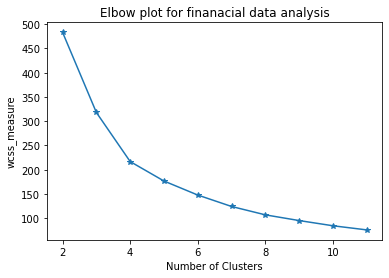

In [49]:
#elbow plot
plt.plot(range(2,12),wcss,marker='*')
plt.title('Elbow plot for finanacial data analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss_measure')
plt.show()

In [50]:
kmeans_mod=KMeans(n_clusters=6,random_state=42)
kmeansmod.fit(scaled_data)
kmeansmod.labels_

array([ 8,  8,  8,  1,  8,  1,  8,  8,  8,  8,  8,  1,  8,  8,  8,  8,  1,
        8,  1,  1,  1,  1,  8,  8,  1,  1,  1,  8,  1,  1,  1,  1,  1,  5,
        1,  1,  1,  1,  8,  1,  8,  5,  5,  5,  1,  1,  1,  1,  1,  5,  5,
        1,  5,  1,  8,  1,  5,  1,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  5,  5,  5,
        5,  5,  5,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  3,  5,  1,
        5,  7,  5,  5,  7,  5,  5,  5,  5,  5,  7,  7,  9,  5,  5,  5,  7,
        9,  5,  5,  8,  7,  9,  7,  5,  9,  7,  5,  5,  5,  5,  7,  9,  5,
        5,  5,  7,  9,  9,  5,  7,  5,  9,  7,  7,  3,  7,  5,  5,  5,  7,
        5,  7,  5,  5,  9,  5,  9,  9,  3,  9,  3,  9,  7,  9,  7,  3,  3,
        3,  3,  3,  3,  3,  9,  3,  7,  3,  9,  9,  3,  9,  9,  9,  3,  9,
        3,  9,  3,  3,  3,  7,  3,  3,  3,  3,  7,  7,  3,  3,  3,  7,  3,
        7,  3,  3,  3,  9,  3,  7,  3,  9,  9,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [51]:
scaled_data['kmeans_label']=kmeansmod.labels_
scaled_data

,Market_capital_in_crores,Sales_quarterly_in_crores,kmeans_label
0,2.147439,2.855483,8
1,2.140639,2.268473,8
2,2.108827,2.038231,8
3,2.014094,1.576053,1
4,1.987459,1.919058,8
...,...,...,...
483,-1.656342,-0.454184,6
484,-1.658308,-1.691650,4
485,-1.659461,-0.894361,6
486,-1.663782,0.678957,0


### model building 

In [52]:
scaled_data

,Market_capital_in_crores,Sales_quarterly_in_crores,kmeans_label
0,2.147439,2.855483,8
1,2.140639,2.268473,8
2,2.108827,2.038231,8
3,2.014094,1.576053,1
4,1.987459,1.919058,8
...,...,...,...
483,-1.656342,-0.454184,6
484,-1.658308,-1.691650,4
485,-1.659461,-0.894361,6
486,-1.663782,0.678957,0


In [53]:
#checking the balance/imbalance data  proportion
scaled_data['kmeans_label'].value_counts()

3     99
5     77
10    67
2     56
1     34
6     31
7     28
4     27
9     25
0     23
8     21
Name: kmeans_label, dtype: int64

In [54]:
scaled_data['kmeans_label'].value_counts(normalize=True)

3     0.202869
5     0.157787
10    0.137295
2     0.114754
1     0.069672
6     0.063525
7     0.057377
4     0.055328
9     0.051230
0     0.047131
8     0.043033
Name: kmeans_label, dtype: float64

In [55]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Market_capital_in_crores   488 non-null    float64
 1   Sales_quarterly_in_crores  488 non-null    float64
 2   kmeans_label               488 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.7 KB


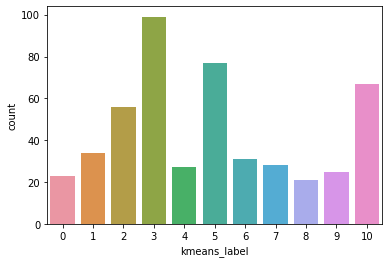

In [56]:
#countplot
sns.countplot(data=scaled_data,x='kmeans_label')
plt.show()

### train test split 

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=scaled_data.drop('kmeans_label',axis=1)
Y=scaled_data['kmeans_label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [59]:
pref_score=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 score'])

def per_measures(model,test,pred,average):
    accuracy  =accuracy_score(test,pred)
    f1score   =f1_score(test,pred,average=average)
    recall    =recall_score(test,pred,average=average)
    precision =precision_score(test,pred,average=average)

    return (accuracy,recall,precision,f1score)

In [60]:
def update_performance(name,model,test,pred,average):
    global pref_score
    pref_score=pref_score.append({'Model'       : name,
                                  'Accuracy'    :per_measures(model,test,pred,average)[0],
                                  'Recall'      :per_measures(model,test,pred,average)[1],
                                  'Precision'   :per_measures(model,test,pred,average)[2],
                                  'F1 score'    :per_measures(model,test,pred,average)[3]},
                                ignore_index=True)

In [61]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

### Decision Tree 

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [63]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [64]:
dt_p=dt.predict(X_test)
dt_p

array([ 7,  0,  3,  3, 10,  2,  6, 10, 10, 10,  2,  5,  9,  3, 10,  2,  3,
        9,  9,  9,  7,  5,  3,  9,  1,  2,  9,  1,  5,  2, 10,  2,  5, 10,
        4, 10,  3,  1,  3,  5,  2,  0,  2, 10,  7,  5,  3,  7,  3,  5,  8,
        5,  1,  2,  9, 10,  3,  4,  3,  7,  3,  3,  5,  2,  0,  5,  3,  8,
        0, 10,  0,  5,  0,  3,  5,  9,  2,  8,  2,  5,  1,  6,  3,  5,  3,
        5,  3,  1,  5,  3, 10,  3,  2,  3,  2,  6,  7,  2])

In [65]:
update_performance(name='DecisionTreeClassifier',model=dt,test=Y_test,pred=dt_p,average='weighted')

In [66]:
pref_score

,Model,Accuracy,Recall,Precision,F1 score
0,DecisionTreeClassifier,0.959184,0.959184,0.964966,0.958679


### XGBoost classifier 

In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [68]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [69]:
xgb_p=dt.predict(X_test)
xgb_p

array([ 7,  0,  3,  3, 10,  2,  6, 10, 10, 10,  2,  5,  9,  3, 10,  2,  3,
        9,  9,  9,  7,  5,  3,  9,  1,  2,  9,  1,  5,  2, 10,  2,  5, 10,
        4, 10,  3,  1,  3,  5,  2,  0,  2, 10,  7,  5,  3,  7,  3,  5,  8,
        5,  1,  2,  9, 10,  3,  4,  3,  7,  3,  3,  5,  2,  0,  5,  3,  8,
        0, 10,  0,  5,  0,  3,  5,  9,  2,  8,  2,  5,  1,  6,  3,  5,  3,
        5,  3,  1,  5,  3, 10,  3,  2,  3,  2,  6,  7,  2])

In [70]:
update_performance(name='XGBoostClassifier',model=xgb,test=Y_test,pred=xgb_p,average='weighted')

In [71]:
pref_score

,Model,Accuracy,Recall,Precision,F1 score
0,DecisionTreeClassifier,0.959184,0.959184,0.964966,0.958679
1,XGBoostClassifier,0.959184,0.959184,0.964966,0.958679
